In [27]:
# Imp libs:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Standardizing and Normalizing data:
from sklearn.preprocessing import StandardScaler

# Spliting data
from sklearn.model_selection import train_test_split,GridSearchCV

# Standardizing data
from sklearn.decomposition import PCA

# Model instantiating
import xgboost as xgb

# Importing metrics
from sklearn.metrics import r2_score,mean_squared_error

# Removing warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# DATA SET :

training_dataset = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv'
df = pd.read_csv(training_dataset)

In [ ]:
"""
EDA: In this project, we have used XGBoost to predict label ie Happiness score,

By data exploration we can observe that: 

1. (158, 12) are the no. of rows,columns respectively in the dataset.
2. From 12 columns Region and Country are categorical in nature , Happiness rank is integer type and rest are float type.
3. There are no null values in dataset.
4. By data description , data seems well distributed but some outliers can be observed , removing them using zscore stats.

"""

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
df.shape

(158, 12)

In [7]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [12]:
# Filtering numerical data and categorical data:

numericals = ['int8','int16','int32','int64','float16','float32','float64',]
categorical_columns = []
numerical_columns = []
features = df.columns.values.tolist()

for col in features:
    if df[col].dtype in numericals:
        numerical_columns.append(col)
    else:
        categorical_columns.append(col)

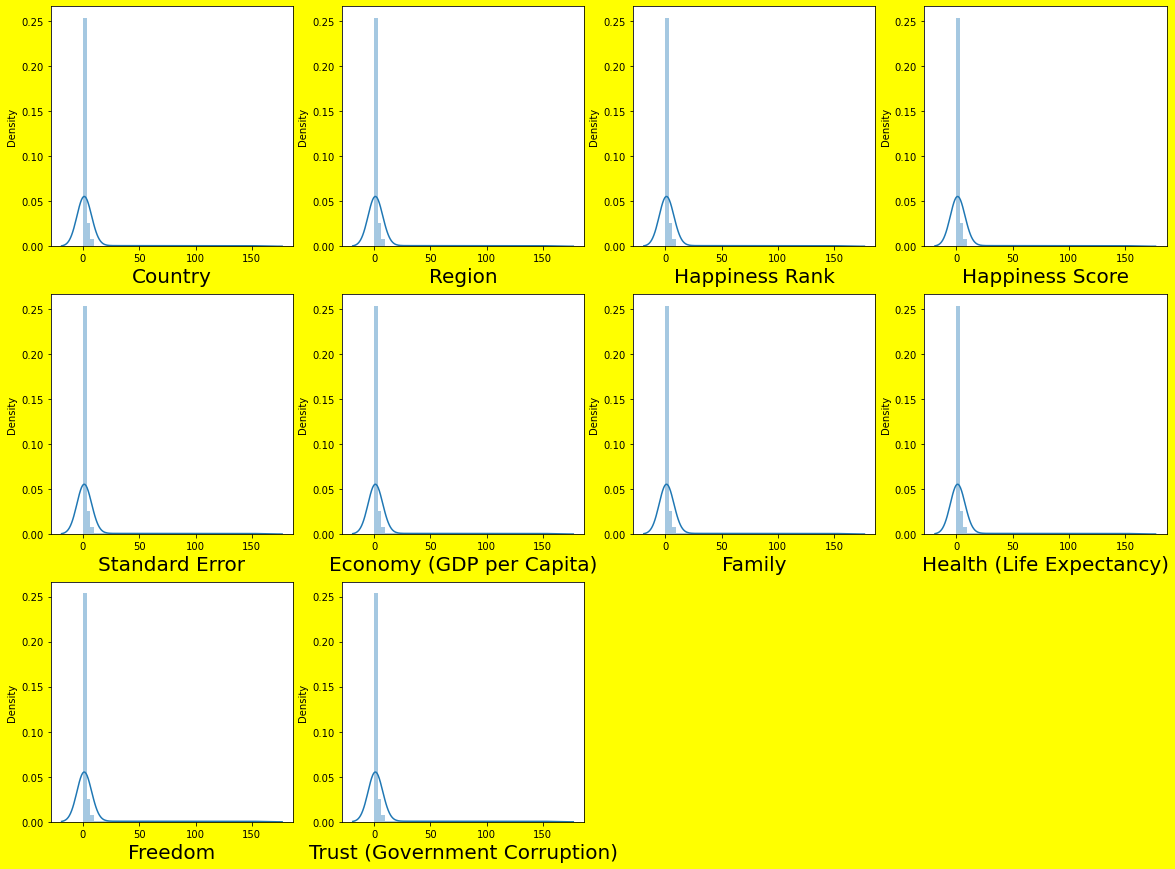

In [16]:
# Checking data distribution:

plt.figure(figsize=(20,15),facecolor='Yellow')
plotnumber = 1
for column in df.columns:
    if plotnumber <= 10:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[numerical_columns])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

In [19]:
# Using Z Statistics to remove outliers:

from scipy.stats import zscore

z_score = zscore(df[numerical_columns])

abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1) # values lying in 3 times std will be removed

df_upd = df[filtering_entry]

df_upd.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,78.627586,5.403586,0.045699,0.856856,1.006146,0.638419,0.424715,0.135747,0.231085,2.110636
std,44.673187,1.103677,0.012882,0.385223,0.253628,0.241943,0.150560,0.107299,0.120783,0.525579
min,1.000000,2.905000,0.018480,0.000000,0.302850,0.000000,0.000000,0.000000,0.000000,0.654290
25%,42.000000,4.565000,0.036800,0.593250,0.869080,0.467210,0.328180,0.059890,0.140740,1.785550
50%,79.000000,5.253000,0.043610,0.918610,1.035160,0.703800,0.430540,0.105010,0.213330,2.090660
75%,117.000000,6.130000,0.050620,1.154060,1.223930,0.813250,0.542100,0.174610,0.296780,2.451760
max,157.000000,7.587000,0.087420,1.563910,1.402230,1.013280,0.669730,0.438440,0.576300,3.602140


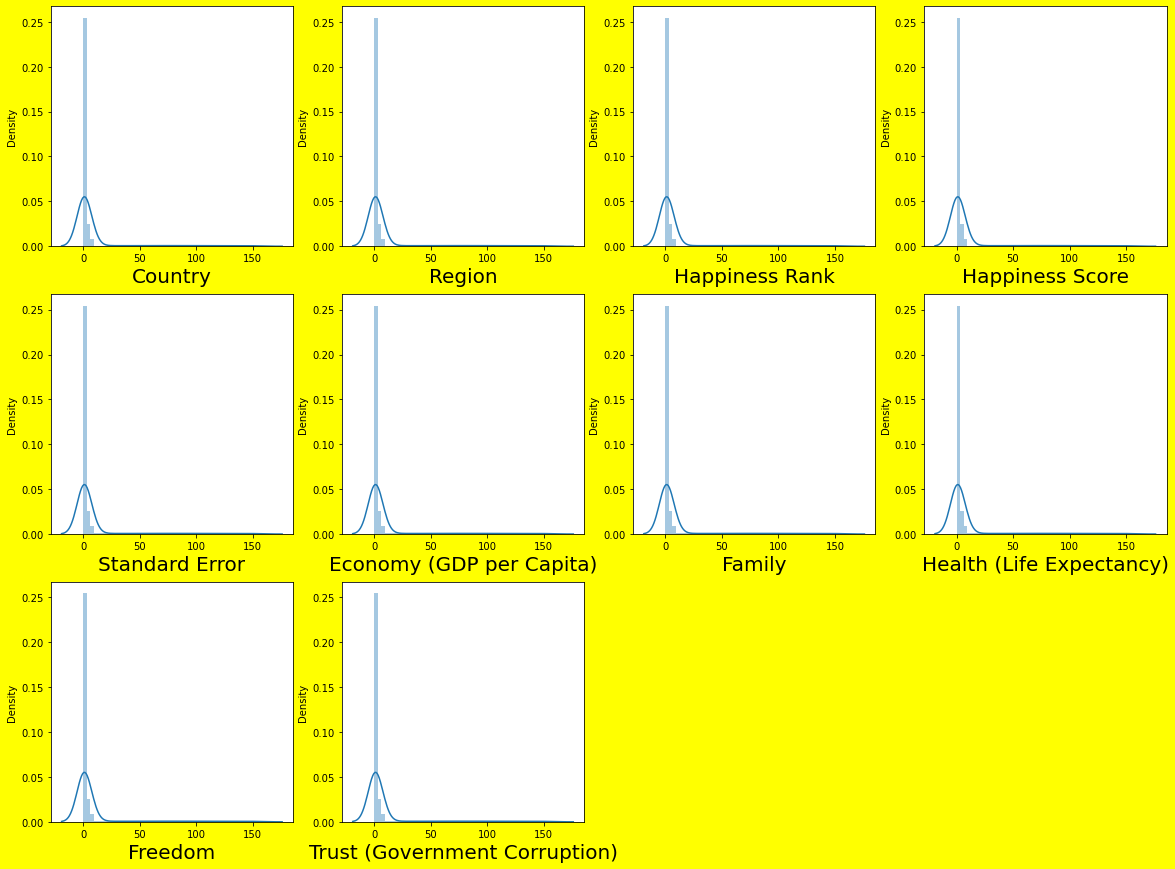

In [20]:
# Checking data distribution:

plt.figure(figsize=(20,15),facecolor='Yellow')
plotnumber = 1
for column in df.columns:
    if plotnumber <= 10:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df_upd[numerical_columns])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

In [15]:
# Encoding categorical columns:

df_dummies = pd.get_dummies(df[categorical_columns],drop_first=True)
df_dummies.head()

,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,...,Country_Zimbabwe,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
df_upd = df_upd.join(df_dummies)

In [43]:
df_upd.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Country_Zimbabwe,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0,0,0,0,0,0,0,0,0,1
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,0,0,0,0,0,0,0,0,0,1
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0,0,0,0,0,0,0,0,0,1
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,0,0,0,0,0,1,0,0,0,0
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,...,0,0,0,0,0,0,0,0,0,1


In [44]:
df_upd.drop(columns=categorical_columns,axis=1,inplace=True)

In [45]:
df_upd.shape

(145, 176)

In [46]:
# Splitting data

X = df_upd.drop(columns = ['Happiness Score'],axis=1)
y = df_upd['Happiness Score']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25 , random_state=10)

In [47]:
# Using XGBoost:

xgb_clf = xgb.XGBRegressor()
xgb_clf.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [48]:
y_pred = xgb_clf.predict(x_test)

In [49]:
r2_score(y_test,y_pred)

0.9901607225049096

In [50]:
params = {"learning_rate"    : [0.05, 0.10] ,
         "max_depth"        : [ 3, 5, 8, 12]}

In [51]:
grd = GridSearchCV(xgb_clf,param_grid=params)

grd.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat_to_onehot=4, max_delta_step=0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             param_grid={'learning_rate': [0.05, 0.1],
                         'max_depth': [3, 5, 8, 12]})

In [52]:
y_gpred = grd.predict(x_test)

In [53]:
r2_score(y_test,y_gpred)*100

99.75557905956063

In [54]:
# Pipelining: 

from sklearn.pipeline import Pipeline

pipe = Pipeline([('grd',GridSearchCV(xgb_clf,param_grid=params))])

pipe.fit(x_train,y_train)

Pipeline(steps=[('grd',
                 GridSearchCV(estimator=XGBRegressor(base_score=0.5,
                                                     booster='gbtree',
                                                     callbacks=None,
                                                     colsample_bylevel=1,
                                                     colsample_bynode=1,
                                                     colsample_bytree=1,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None, gamma=0,
                                                     gpu_id=-1,
                                                     grow_policy='depthwise',
                                                     importance_type=None,
                                                     interaction_constraints='',
                                                     learning_rate=0.300000012,
                                                     max_bin=256,
                                                     max_cat_to_onehot=4,
                                                     max_delta_step=0,
                                                     max_depth=6, max_leaves=0,
                                                     min_child_weight=1,
                                                     missing=nan,
                                                     monotone_constraints='()',
                                                     n_estimators=100, n_jobs=0,
                                                     num_parallel_tree=1,
                                                     predictor='auto',
                                                     random_state=0,
                                                     reg_alpha=0, reg_lambda=1, ...),
                              param_grid={'learning_rate': [0.05, 0.1],
                                          'max_depth': [3, 5, 8, 12]}))])

In [55]:
y_ppred = pipe.predict(x_test)

In [56]:
r2_score(y_test,y_ppred)*100

99.75557905956063

In [57]:
# Saving model to pickle string

import pickle 
saved_model = pickle.dumps(pipe) 
pipe_pickle = pickle.loads(saved_model)
pipe_pickle.predict(x_test) # predicting testing data


array([4.7026024, 5.610116 , 4.2543964, 4.690867 , 5.033019 , 4.2533255,
       7.2041764, 6.74001  , 3.8075483, 5.7559247, 5.112083 , 6.31735  ,
       3.6559162, 6.830787 , 7.5659857, 4.693115 , 6.8570437, 5.463032 ,
       5.2873783, 3.6574209, 5.007487 , 3.5756924, 5.6096396, 7.4168434,
       5.044032 , 4.351757 , 5.268852 , 5.859094 , 4.618996 , 5.7668405,
       3.992712 , 5.7601995, 6.1219897, 3.813033 , 5.973146 , 4.513398 ,
       5.271801 ], dtype=float32)